<a href="https://colab.research.google.com/github/ElainaMarieC/ElainaMarieC/blob/main/Cap3_InvisibleCriminals031821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Invisible" 'Criminals'**
Invisibility is defined as unable to be seen, not visible to the eye. So, consider this: what can one do whilst being invisible? Where would you go? What would you do? And most importantly, would you try and get away with committing crimes? How many ‘criminals’ are there that have not been caught and/or arrested…that are ‘invisible’?. That is the beginning of my questioning. Although numerous, my inquisitions are not limited to ‘rapists’, ‘molesters’, or ‘thieves’; I am referring to all ‘criminals’ that are “invisible”. I am speaking of those that fit the description of unable to be seen, not visible to the eye. Even so, criminals that were caught, arrested, and sentenced were “invisible” at one point in their path of destruction. ‘Invisible criminals’ feel they are getting away with ‘murder’. When will something be done about it? I feel to answer these types of questions, I would need to analyze the data that we can ‘see’.

file link--->https://colab.research.google.com/drive/1mntFsYcPk83nNCG-USAYymxt4ohpxiEp?usp=sharing

excelbook link--->https://drive.google.com/file/d/19MM9Ir1Uv9DoxhAYuthl-fHXlYRHE1rU/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Initial Run (Press Play)***

In [ ]:
#imports here
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import requests
import pathlib
from pathlib import Path

In [ ]:
#connecting to gdrive
from google.colab import drive
drive.mount('/content/gdrive')
#import csv
df=pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/ReportedIncidents.csv')

Mounted at /content/gdrive



# *DF Info*

Our research asks how many 'individual' 'criminals' are there, what are the differences in crime reporting over 40 years, and what is the relation to the population now. We start by analyzing our dataset from the FBI.

In [ ]:
# no nulls found
null_rows = df[df.isnull().any(axis=1)]
null_rows.head(10)

,year,state_name,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft


In [ ]:
# no nulls, but still good code; % of null in each column
for column in df.columns:
  percentage = df[column].isnull().mean()
  print(f'{column}: {round(percentage*100, 2)}%')

year: 0.0%
state_name: 0.0%
 population : 0.0%
 violent_crime : 0.0%
 homicide : 0.0%
 rape_legacyrevised : 0.0%
 robbery : 0.0%
 aggravated_assault : 0.0%
 property_crime : 0.0%
 burglary : 0.0%
 larceny : 0.0%
 motor_vehicle_theft : 0.0%


In [ ]:
def printDataFrame(df):
  print('The shape of this DataFrame is {}'.format(df.shape))
  print('The columns in this DataFrame are {}'.format(df.columns))
  print('The info:')
  print(df.info())
printDataFrame(df)
df.head(2)

The shape of this DataFrame is (2116, 12)
The columns in this DataFrame are Index(['year', 'state_name', ' population ', ' violent_crime ', ' homicide ',
       ' rape_legacyrevised ', ' robbery ', ' aggravated_assault ',
       ' property_crime ', ' burglary ', ' larceny ', ' motor_vehicle_theft '],
      dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   2116 non-null   int64 
 1   state_name             2116 non-null   object
 2    population            2116 non-null   object
 3    violent_crime         2116 non-null   object
 4    homicide              2116 non-null   object
 5    rape_legacyrevised    2116 non-null   object
 6    robbery               2116 non-null   object
 7    aggravated_assault    2116 non-null   object
 8    property_crime        2116 non-null   objec

,year,state_name,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
0,1979,Total,"220,099,000","1,208,030","21,460","76,390","480,700","629,480","11,041,500","3,327,700","6,601,000","1,112,800"
1,1979,Alaska,"406,000","1,994",54,292,445,"1,203","23,193","5,616","15,076","2,501"


In [ ]:
df.tail(2)

,year,state_name,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
2114,2019,Wyoming,"578,759","1,258",13,324,67,854,"9,093","1,396","6,984",713
2115,2019,Total,"328,239,523","1,245,410","16,425","139,815","267,988","821,182","6,925,677","1,117,696","5,086,096","721,885"


In [ ]:
# total items (i.e. cells) in df
df.size


25392

In [ ]:
# convert objects to floats
for col in df.columns[2:13]:
  df[col] = df[col].replace([','], '', regex=True)
for col in df.columns[2:12]:
  df[col] = df[col].astype(float)
df.head(2)

,year,state_name,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
0,1979,Total,220099000.0,1208030.0,21460.0,76390.0,480700.0,629480.0,11041500.0,3327700.0,6601000.0,1112800.0
1,1979,Alaska,406000.0,1994.0,54.0,292.0,445.0,1203.0,23193.0,5616.0,15076.0,2501.0


1979-2019, 51 states(USA); Year column is year of crimes, population is the actual estimate for the respective year, and violent_crime to motor_vehicle_theft are the types of crimes reported.

In [ ]:
df.columns

Index(['year', 'state_name', ' population ', ' violent_crime ', ' homicide ',
       ' rape_legacyrevised ', ' robbery ', ' aggravated_assault ',
       ' property_crime ', ' burglary ', ' larceny ', ' motor_vehicle_theft '],
      dtype='object')

In [ ]:
# Count the number of unique values in column
df.nunique()

year                       41
state_name                 52
 population              2041
 violent_crime           2057
 homicide                 842
 rape_legacyrevised      1542
 robbery                 1879
 aggravated_assault      2029
 property_crime          2105
 burglary                2085
 larceny                 2105
 motor_vehicle_theft     2031
dtype: int64

In [ ]:
# Frequency of each value state_name column is 41 (40 years), with the
# exception of MS
state_counts = df['state_name'].value_counts()
state_counts

Nevada                  41
Kentucky                41
Indiana                 41
Rhode Island            41
Hawaii                  41
New Hampshire           41
California              41
New Mexico              41
Maryland                41
Oregon                  41
North Dakota            41
Arkansas                41
Texas                   41
North Carolina          41
Arizona                 41
Delaware                41
Georgia                 41
Wisconsin               41
Montana                 41
Washington              41
Vermont                 41
Maine                   41
Michigan                41
Nebraska                41
Illinois                41
Kansas                  41
New Jersey              41
South Carolina          41
New York                41
Total                   41
Ohio                    41
Colorado                41
Massachusetts           41
Iowa                    41
Alabama                 41
Virginia                41
Wyoming                 41
P

In [ ]:
df.year.unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

Median of years is 1999 (in statistics section).

In [ ]:
#1999
df.iloc[1025:1075]

,year,state_name,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
1025,1999,Alaska,619500.0,3908.0,52.0,517.0,566.0,2773.0,23099.0,3787.0,16654.0,2658.0
1026,1999,Alabama,4369862.0,21421.0,345.0,1513.0,5297.0,14266.0,171398.0,38648.0,119616.0,13134.0
1027,1999,Arkansas,2551373.0,10848.0,143.0,710.0,2024.0,7971.0,92283.0,21692.0,63927.0,6664.0
1028,1999,Arizona,4778332.0,26334.0,384.0,1383.0,7288.0,17279.0,255401.0,49423.0,167731.0,38247.0
1029,1999,California,33145121.0,207879.0,2005.0,9363.0,60039.0,136472.0,1053285.0,223814.0,660991.0,168480.0
1030,1999,Colorado,4056133.0,13811.0,185.0,1679.0,3056.0,8891.0,151002.0,26979.0,109228.0,14795.0
1031,1999,Connecticut,3282031.0,11342.0,107.0,654.0,4054.0,6527.0,99894.0,19298.0,69299.0,11297.0
1032,1999,District of Columbia,519000.0,8448.0,241.0,248.0,3344.0,4615.0,33420.0,5067.0,21701.0,6652.0
1033,1999,Delaware,753538.0,5534.0,24.0,529.0,1492.0,3489.0,30922.0,5245.0,22634.0,3043.0
1034,1999,Florida,15111244.0,129044.0,859.0,6990.0,31969.0,89226.0,808674.0,181378.0,534105.0,93191.0


In [ ]:
# Sum of each crime category
df_crimes = df[[' violent_crime ', ' homicide ', ' rape_legacyrevised ', ' robbery ', ' aggravated_assault ', ' property_crime ', ' burglary ', ' larceny ', ' motor_vehicle_theft ']]
df_crimes.sum()

 violent_crime           118112559.0
 homicide                  1513612.0
 rape_legacyrevised        7777973.0
 robbery                  38212961.0
 aggravated_assault       70437025.0
 property_crime          858587600.0
 burglary                202931708.0
 larceny                 562960552.0
 motor_vehicle_theft      92695940.0
dtype: float64

In [ ]:
df_crimes.size

19044

# *Data Manipulation*

Checking to see memory usage with type change.

In [29]:
# 17k appx. before change
df.year.memory_usage()

20283

In [30]:
df['year'] = df['year'].astype('category')
df.year.memory_usage()

20283

In [41]:
# prior to change, 103571
df.state_name.memory_usage()

103571

In [44]:
# not a significant change
df['state_name'] = df['state_name'].astype('category')
df.state_name.memory_usage()

103563

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 1 to 2114
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   2075 non-null   category
 1   state_name             2075 non-null   category
 2    population            2075 non-null   float64 
 3    violent_crime         2075 non-null   float64 
 4    homicide              2075 non-null   float64 
 5    rape_legacyrevised    2075 non-null   float64 
 6    robbery               2075 non-null   float64 
 7    aggravated_assault    2075 non-null   float64 
 8    property_crime        2075 non-null   float64 
 9    burglary              2075 non-null   float64 
 10   larceny               2075 non-null   float64 
 11   motor_vehicle_theft   2075 non-null   float64 
dtypes: category(2), float64(10)
memory usage: 186.8 KB


Total rows have totals for each year, but will not be needed with dataframe (df).

row# 2114 2019	Wyoming	578759.0	1258.0	13.0	324.0	67.0	854.0	9093.0	1396.0	6984.0	713.0

**row# 2115**	2019	**Total**	328239523.0	1245410.0	16425.0	139815.0	267988.0	821182.0	6925677.0	1117696.0	5086096.0	721885.0

In [52]:
#delete total rows for proper calculations
total_rows = df[(df['state_name'] == 'Total')].index
# delete these rows
df.drop(total_rows, inplace=True)
df.tail(2)

,year,state_name,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
2113,2019,West Virginia,1792147.0,5674.0,78.0,754.0,378.0,4464.0,28376.0,5891.0,20066.0,2419.0
2114,2019,Wyoming,578759.0,1258.0,13.0,324.0,67.0,854.0,9093.0,1396.0,6984.0,713.0


In [35]:
df_crimes = df[([' violent_crime ', ' homicide ', ' rape_legacyrevised ', ' robbery ', ' aggravated_assault ', ' property_crime ', ' burglary ', ' larceny ', ' motor_vehicle_theft '])]
df_crimes.columns

Index([' violent_crime ', ' homicide ', ' rape_legacyrevised ', ' robbery ',
       ' aggravated_assault ', ' property_crime ', ' burglary ', ' larceny ',
       ' motor_vehicle_theft '],
      dtype='object')

In [45]:
df_crimes.size

18675

In [47]:
#pivot table for population size per year per state
dfpivot_pop = df.pivot(index='state_name', columns='year', values=' population ')

In [48]:
#pivot table for property crime category per year, per state
dfpivot_property = df.pivot(index='state_name', columns='year', values=' property_crime ')

# *Manipulated Dataframes*

In [49]:
df_crimes

,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
1,1994.0,54.0,292.0,445.0,1203.0,23193.0,5616.0,15076.0,2501.0
2,15578.0,496.0,1037.0,4127.0,9918.0,144372.0,48517.0,83791.0,12064.0
3,7984.0,198.0,595.0,1626.0,5565.0,70949.0,21457.0,45267.0,4225.0
4,14528.0,219.0,1120.0,4305.0,8884.0,177977.0,48916.0,116976.0,12085.0
5,184087.0,2952.0,12239.0,75767.0,93129.0,1511021.0,496310.0,847148.0,167563.0
...,...,...,...,...,...,...,...,...,...
2110,1262.0,11.0,278.0,71.0,902.0,8888.0,1275.0,7315.0,298.0
2111,22377.0,198.0,3332.0,5147.0,13700.0,204224.0,34540.0,145282.0,24402.0
2112,17070.0,175.0,2261.0,2991.0,11643.0,85672.0,12667.0,65620.0,7385.0
2113,5674.0,78.0,754.0,378.0,4464.0,28376.0,5891.0,20066.0,2419.0


In [50]:
dfpivot_pop

year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
state_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,3769000.0,3861466.0,3916000.0,3943000.0,3959000.0,3990000.0,4021000.0,4053000.0,4083000.0,4127000.0,4118000.0,4040587.0,4089000.0,4136000.0,4187000.0,4219000.0,4253000.0,4273000.0,4319000.0,4352000.0,4369862.0,4447100.0,4468912.0,4478896.0,4503726.0,4525375.0,4548327.0,4599030.0,4627851.0,4661900.0,4708708.0,4785401.0,4803689.0,4817528.0,4833996.0,4846411.0,4853875.0,4860545.0,4875120.0,4887681.0,4903185.0
Alaska,406000.0,440142.0,412000.0,438000.0,479000.0,500000.0,521000.0,534000.0,525000.0,513000.0,527000.0,550043.0,570000.0,587000.0,599000.0,606000.0,604000.0,607000.0,609000.0,614000.0,619500.0,626932.0,633630.0,641482.0,648280.0,657755.0,663253.0,670053.0,683478.0,686293.0,698473.0,714146.0,723860.0,730307.0,737259.0,737046.0,737709.0,741522.0,739786.0,735139.0,731545.0
Arizona,2450000.0,2715357.0,2793000.0,2860000.0,2963000.0,3053000.0,3187000.0,3317000.0,3386000.0,3466000.0,3556000.0,3665228.0,3750000.0,3832000.0,3936000.0,4075000.0,4218000.0,4428000.0,4555000.0,4669000.0,4778332.0,5130632.0,5306966.0,5441125.0,5579222.0,5739879.0,5953007.0,6166318.0,6338755.0,6500180.0,6595778.0,6413158.0,6467315.0,6551149.0,6634997.0,6728783.0,6817565.0,6908642.0,7048876.0,7158024.0,7278717.0
Arkansas,2180000.0,2284037.0,2294000.0,2291000.0,2328000.0,2349000.0,2359000.0,2372000.0,2388000.0,2422000.0,2406000.0,2350725.0,2372000.0,2399000.0,2424000.0,2453000.0,2484000.0,2510000.0,2523000.0,2538000.0,2551373.0,2673400.0,2694698.0,2706268.0,2727774.0,2750000.0,2775708.0,2810872.0,2834797.0,2855390.0,2889450.0,2921588.0,2938582.0,2949828.0,2958765.0,2966835.0,2977853.0,2988231.0,3002997.0,3009733.0,3017804.0
California,22696000.0,23532680.0,24159000.0,24724000.0,25174000.0,25622000.0,26365000.0,26981000.0,27663000.0,28168000.0,29063000.0,29760021.0,30380000.0,30867000.0,31211000.0,31431000.0,31589000.0,31878000.0,32268000.0,32667000.0,33145121.0,33871648.0,34600463.0,35001986.0,35462712.0,35842038.0,36154147.0,36457549.0,36553215.0,36756666.0,36961664.0,37338198.0,37683933.0,37999878.0,38431393.0,38792291.0,38993940.0,39296476.0,39399349.0,39461588.0,39512223.0
Colorado,2772000.0,2878407.0,2963000.0,3045000.0,3139000.0,3178000.0,3231000.0,3267000.0,3296000.0,3290000.0,3317000.0,3294394.0,3377000.0,3470000.0,3566000.0,3656000.0,3747000.0,3823000.0,3893000.0,3971000.0,4056133.0,4301261.0,4430989.0,4501051.0,4547633.0,4601821.0,4663295.0,4753377.0,4861515.0,4939456.0,5024748.0,5047692.0,5116302.0,5189458.0,5272086.0,5355588.0,5448819.0,5530105.0,5615902.0,5691287.0,5758736.0
Connecticut,3115000.0,3095224.0,3132000.0,3153000.0,3138000.0,3154000.0,3174000.0,3189000.0,3211000.0,3241000.0,3239000.0,3287116.0,3291000.0,3281000.0,3277000.0,3275000.0,3275000.0,3274000.0,3270000.0,3274000.0,3282031.0,3405565.0,3434602.0,3458587.0,3486960.0,3498966.0,3500701.0,3504809.0,3502309.0,3501252.0,3518288.0,3575498.0,3586717.0,3591765.0,3599341.0,3594762.0,3584730.0,3587685.0,3573880.0,3571520.0,3565287.0
Delaware,582000.0,594779.0,598000.0,602000.0,606000.0,613000.0,622000.0,633000.0,644000.0,660000.0,673000.0,666168.0,680000.0,689000.0,700000.0,706000.0,717000.0,725000.0,732000.0,744000.0,753538.0,783600.0,796599.0,805945.0,818166.0,830069.0,841741.0,853476.0,864764.0,873092.0,885122.0,899792.0,908137.0,917053.0,925240.0,935968.0,944076.0,952698.0,957078.0,965479.0,973764.0
District of Columbia,656000.0,635233.0,636000.0,631000.0,623000.0,623000.0,626000.0,626000.0,622000.0,620000.0,604000.0,606900.0,598000.0,589000.0,578000.0,570000.0,554000.0,543000.0,529000.0,523000.0,519000.0,572059.0,573822.0,569157.0,557620.0,554239.0,582049.0,581530.0,588292.0,591833.0,599657.0,604912.0,619020.0,633427.0,649111.0,659836.0,670377.0,684336.0,695691.0,701547.0,705749.0


In [51]:
dfpivot_property

year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
state_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,144372.0,173191.0,173411.0,165048.0,145890.0,138487.0,140115.0,151191.0,158918.0,165209.0,166244.0,169974.0,184882.0,181837.0,171598.0,178015.0,179294.0,181803.0,186809.0,177779.0,171398.0,180539.0,173253.0,180400.0,182241.0,182340.0,177393.0,181249.0,184082.0,190416.0,178007.0,168828.0,173192.0,168878.0,161835.0,154087.0,144785.0,143259.0,143774.0,138702.0,131133.0
Alaska,23193.0,22930.0,24634.0,24479.0,25889.0,27468.0,27588.0,30307.0,25841.0,22566.0,22567.0,25457.0,29000.0,28816.0,28795.0,29947.0,30097.0,28667.0,27840.0,25316.0,23099.0,23087.0,23160.0,24118.0,24386.0,22172.0,23975.0,23975.0,23096.0,20090.0,20538.0,20259.0,19094.0,20037.0,21211.0,20334.0,20806.0,24876.0,26203.0,24345.0,21294.0
Arizona,177977.0,204193.0,196575.0,189161.0,174740.0,182670.0,207591.0,221015.0,222663.0,237808.0,265284.0,265229.0,252559.0,243629.0,264371.0,294273.0,316355.0,284964.0,299323.0,280001.0,255401.0,271811.0,293874.0,318296.0,314335.0,291203.0,287345.0,294389.0,287308.0,266653.0,236721.0,226802.0,229896.0,231701.0,223294.0,213406.0,207184.0,207317.0,204999.0,192730.0,177638.0
Arkansas,70949.0,79390.0,79972.0,81259.0,74563.0,71554.0,76372.0,83729.0,91537.0,91962.0,98213.0,101897.0,108677.0,100402.0,102231.0,103115.0,102780.0,104790.0,105759.0,96271.0,92283.0,98115.0,99106.0,101171.0,99084.0,110911.0,112914.0,112025.0,112130.0,110360.0,109078.0,103820.0,110430.0,109389.0,106477.0,99452.0,97391.0,98092.0,94419.0,89177.0,86250.0
California,1511021.0,1633042.0,1625302.0,1599827.0,1486487.0,1461731.0,1516710.0,1576299.0,1545928.0,1607180.0,1681516.0,1654186.0,1726391.0,1716137.0,1678884.0,1622102.0,1536830.0,1385135.0,1312367.0,1188791.0,1053285.0,1056183.0,1134189.0,1176484.0,1215086.0,1227194.0,1200531.0,1159988.0,1112510.0,1080996.0,1009433.0,981939.0,973822.0,1049465.0,1018907.0,947193.0,1024914.0,1002070.0,987063.0,941644.0,921114.0
Colorado,180984.0,195872.0,202119.0,200230.0,193070.0,191104.0,208336.0,212626.0,197225.0,187719.0,184692.0,182106.0,186235.0,186684.0,176856.0,175808.0,185705.0,180218.0,166902.0,163189.0,151002.0,156937.0,170887.0,180054.0,179706.0,180322.0,188449.0,163439.0,145808.0,139340.0,134196.0,135001.0,132781.0,139355.0,139974.0,135789.0,144044.0,152146.0,152032.0,154292.0,149189.0
Connecticut,167131.0,169283.0,168790.0,158532.0,144437.0,133573.0,136572.0,140411.0,146958.0,150455.0,154119.0,158867.0,158770.0,149535.0,137443.0,134030.0,134188.0,124924.0,117505.0,111978.0,99894.0,99033.0,95299.0,93426.0,92981.0,93942.0,90270.0,90638.0,86528.0,87210.0,82625.0,78259.0,77205.0,77169.0,71274.0,69326.0,65610.0,64875.0,63646.0,59356.0,50862.0
Delaware,34853.0,37482.0,36958.0,35067.0,30378.0,28021.0,28164.0,27881.0,29032.0,28693.0,28998.0,31344.0,35055.0,29126.0,29304.0,29971.0,31790.0,30643.0,36578.0,34230.0,30922.0,29727.0,27399.0,26967.0,27943.0,27256.0,26245.0,29670.0,29216.0,31385.0,29685.0,31078.0,31163.0,30707.0,29001.0,27915.0,25545.0,26370.0,23430.0,22405.0,21931.0
District of Columbia,45877.0,50896.0,53442.0,52295.0,45843.0,42799.0,39904.0,42781.0,42553.0,49557.0,49235.0,50470.0,49722.0,50502.0,51091.0,48009.0,52697.0,51188.0,41341.0,37222.0,33420.0,33000.0,35232.0,36477.0,32696.0,26896.0,26133.0,27064.0,28922.0,30211.0,28495.0,28802.0,29654.0,30757.0,31097.0,34147.0,31444.0,32377.0,29736.0,30726.0,30821.0


# *Statistics & Hypotheses*
H0: mu1 == mu2,

Ha: mu1 != mu2

In [54]:
from scipy.stats import norm, chi2
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

In [55]:
df['year'].describe()

count     2075
unique      41
top       2019
freq        51
Name: year, dtype: int64

In [56]:
df.describe()

,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2.075000e+03,2075.000000,2075.000000,2075.000000
mean,5.449341e+06,28451.162410,363.533012,1871.081446,9198.838554,16952.382169,2.065551e+05,48782.595181,135457.427470,22315.356627
std,6.110394e+06,41499.641985,501.796722,2190.169305,16016.051872,23963.155585,2.519916e+05,65137.891859,155014.779393,36477.615929
min,4.060000e+05,322.000000,1.000000,50.000000,41.000000,213.000000,8.211000e+03,1275.000000,6451.000000,184.000000
25%,1.343668e+06,4920.500000,51.000000,447.000000,1078.500000,3235.500000,4.595050e+04,10621.000000,31195.500000,4150.000000
50%,3.713000e+06,14781.000000,191.000000,1242.000000,4018.000000,9200.000000,1.402130e+05,29740.000000,94537.000000,11194.000000
75%,6.416758e+06,33371.500000,468.500000,2169.000000,9330.500000,20574.000000,2.401875e+05,56296.500000,158158.500000,23044.500000
max,3.951222e+07,345624.000000,4096.000000,15506.000000,130897.000000,198045.000000,1.726391e+06,545138.000000,986120.000000,320112.000000


In [57]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [58]:
# highest amount of crimes reported
series_statistics(df[' property_crime '])

statistics for column:  property_crime 
The max value in the column: 1726391.0
The min value in the column: 8211.0
The mode value in the column: 0      16648.0
1      17326.0
2      23975.0
3      31436.0
4      41301.0
5      44528.0
6      64563.0
7      65652.0
8      74639.0
9     177779.0
10    194636.0
dtype: float64
The median value in the column: 140213.0
The mean of the column: 206555.138313253
The std of the column: 251991.63933037425


In [59]:
# lowest amount of crimes reported
series_statistics(df[' homicide '])

statistics for column:  homicide 
The max value in the column: 4096.0
The min value in the column: 1.0
The mode value in the column: 0    21.0
dtype: float64
The median value in the column: 191.0
The mean of the column: 363.53301204819275
The std of the column: 501.79672188145304


In [60]:
# significant change over 40 years
series_statistics(df[' rape_legacyrevised '])

statistics for column:  rape_legacyrevised 
The max value in the column: 15506.0
The min value in the column: 50.0
The mode value in the column: 0    160.0
dtype: float64
The median value in the column: 1242.0
The mean of the column: 1871.0814457831325
The std of the column: 2190.169304873367


In [61]:
# significant change over 40 years
series_statistics(df[' burglary '])

statistics for column:  burglary 
The max value in the column: 545138.0
The min value in the column: 1275.0
The mode value in the column: 0    3515.0
dtype: float64
The median value in the column: 29740.0
The mean of the column: 48782.59518072289
The std of the column: 65137.891859424264


Are there any linear relationships? 1 means strong, -1 means strong negatively, and 0 means none.
Year is discrete. All other [continous] columns are close to having a strong correlation.

In [62]:
# correlate entire dataframe
df.corr()

,population,violent_crime,homicide,rape_legacyrevised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
population,1.000000,0.898203,0.867288,0.913048,0.829370,0.896118,0.895725,0.812073,0.915482,0.847243
violent_crime,0.898203,1.000000,0.952352,0.895760,0.961825,0.985518,0.956888,0.910256,0.949224,0.951047
homicide,0.867288,0.952352,1.000000,0.884720,0.930857,0.923849,0.950222,0.932804,0.935815,0.921716
rape_legacyrevised,0.913048,0.895760,0.884720,1.000000,0.808580,0.898713,0.921434,0.866785,0.933024,0.852598
robbery,0.829370,0.961825,0.930857,0.808580,1.000000,0.902925,0.913139,0.890538,0.892888,0.923437
aggravated_assault,0.896118,0.985518,0.923849,0.898713,0.902925,1.000000,0.941252,0.881553,0.940427,0.931669
property_crime,0.895725,0.956888,0.950222,0.921434,0.913139,0.941252,1.000000,0.975486,0.994658,0.939320
burglary,0.812073,0.910256,0.932804,0.866785,0.890538,0.881553,0.975486,1.000000,0.955174,0.893988
larceny,0.915482,0.949224,0.935815,0.933024,0.892888,0.940427,0.994658,0.955174,1.000000,0.915982
motor_vehicle_theft,0.847243,0.951047,0.921716,0.852598,0.923437,0.931669,0.939320,0.893988,0.915982,1.000000


Entire dataframe is nearly a strong correlation (1) to eachother. That is to assume that all goes up if any goes up; if any goes down, all go down.

In [63]:
#1 means a strong positive relationship, a linear relationship
df[' population '].corr(df[' property_crime '])

0.8957250336381373

Above correclation test shows example of nearly strong correlation betwen population and property crime: if the population is high, the property crimes are high. No people, no crimes...obviously.

Did crime reporting change between 1979 and 2019?

In [64]:
# independent sample t-test, but first filter years
df_indt_1979 = df.iloc[(df['year'] == 1979).values]
df_indt_2019 = df.iloc[(df['year'] == 2019).values]


Just a quick look at the population change.

In [65]:
stats.ttest_ind(df_indt_1979[' population '], df_indt_2019[' population '])
#there is a difference of 1.70 standard deviations between these two means.
#there is no significant change in the population from 1979 to 2019. (fail to rejet the null)

Ttest_indResult(statistic=-1.7000025474920402, pvalue=0.09227022875553625)

In [67]:
stats.ttest_ind(df_indt_1979[' rape_legacyrevised '], df_indt_2019[' rape_legacyrevised '])
#significant difference, p<.05


Ttest_indResult(statistic=-2.3345429522841576, pvalue=0.02158718975589434)

Rape crime means and sums are below for 2019 and 1979.

In [68]:
df_indt_1979[' rape_legacyrevised '].sum()

75837.0

In [70]:
df_indt_1979[' rape_legacyrevised '].mean()

1516.74

In [69]:
df_indt_2019[' rape_legacyrevised '].sum()

139815.0

In [71]:
df_indt_2019[' rape_legacyrevised '].mean()

2741.470588235294

In [75]:
stats.ttest_ind(df_indt_1979[' burglary '], df_indt_2019[' burglary '])
#significant differenct, p<.05

Ttest_indResult(statistic=3.42302571514321, pvalue=0.0009019609318766213)

In [76]:
df_indt_1979[' burglary '].sum()

3304284.0

In [77]:
df_indt_1979[' burglary '].mean()

66085.68

In [78]:
df_indt_2019[' burglary '].sum()

1117696.0

In [79]:
df_indt_2019[' burglary '].mean()

21915.607843137255

In [73]:
stats.ttest_ind(df_indt_1979[' motor_vehicle_theft '], df_indt_2019[' motor_vehicle_theft '])
# no significant difference

Ttest_indResult(statistic=1.463981634630705, pvalue=0.1463670891890769)

In [74]:
stats.ttest_ind(df_indt_1979[' larceny '], df_indt_2019[' larceny '])
# no significant difference

Ttest_indResult(statistic=1.162222922814343, pvalue=0.24793907377405644)

In [72]:
stats.ttest_ind(df_indt_1979[' violent_crime '], df_indt_2019[' violent_crime '])
# no significant difference

Ttest_indResult(statistic=-0.06279643290461948, pvalue=0.9500552186461718)

In [80]:
stats.ttest_ind(df_indt_1979[' aggravated_assault '], df_indt_2019[' aggravated_assault '])
# no signigicant difference

Ttest_indResult(statistic=-0.9897755961875436, pvalue=0.32469677113122164)

In [81]:
stats.ttest_ind(df_indt_1979[' robbery '], df_indt_2019[' robbery '])
# no signifigant difference

Ttest_indResult(statistic=1.586382079202429, pvalue=0.11584170019363924)

In [82]:
stats.ttest_ind(df_indt_1979[' homicide '], df_indt_2019[' homicide '])
# no significant difference

Ttest_indResult(statistic=1.0337738553097513, pvalue=0.303760615382861)

There is a difference of 1.88 standard deviations between the two means below.
There is no significant change in the reports of property crime (highest amount of crimes reported) between the years of 1979 and 2019, a span of 40 years.

In [ ]:
stats.ttest_ind(df_indt_1979[' property_crime '], df_indt_2019[' property_crime '])

Ttest_indResult(statistic=1.8764597072081137, pvalue=0.06353751274554008)

The output below shows if there is a statistical significance of a correlation, the Pearson correlation test. I am testing the likelihood of a linear relationship as existing in the overall population. This would suggest a significant correlation between the two variables to generalize out to the population. If the value is near ± 1, then it is said to be a perfect correlation. A positive correlation is as one variable increases, the other variable tends to also increase. There is a heat map in the *Visualizations* section to see this better.

In [83]:
# p-value close to zero, Python puts zero; copy of ttest below it
stats.pearsonr(df[' population '], df[' property_crime '])

(0.8957250336381375, 0.0)

In [93]:
# signigicant test (e-284); strong, positive linear relationship
stats.ttest_ind(df[' population '], df[' property_crime '])

Ttest_indResult(statistic=39.05106996767567, pvalue=2.344473486973308e-284)

In [94]:
stats.pearsonr(df[' property_crime '], df[' rape_legacyrevised '])

(0.9214335507525039, 0.0)

In [86]:
# signigicant test (e-259), strong positive linear relationship
stats.ttest_ind(df[' rape_legacyrevised '], df[' property_crime '])

Ttest_indResult(statistic=-36.99904649113447, pvalue=3.2540931295333537e-259)

In [87]:
stats.pearsonr(df[' population '], df[' rape_legacyrevised '])

(0.9130478913994898, 0.0)

In [88]:
# signigicant test (e-304), strong positive linear relationship
stats.ttest_ind(df[' population '], df[' rape_legacyrevised '])

Ttest_indResult(statistic=40.61015295766644, pvalue=7.0950101141864364e-304)

Next, to find the confidence intervals.

In [89]:
# Calculate the standard error and compute the confidence intervals 
# for property crime
import math

In [90]:
# Calculate the sample size, mean, and variance (property crime)
sample_1_n = df_indt_1979.shape[0]
sample_2_n = df_indt_2019.shape[0]
sample_1_mean = df_indt_1979[' property_crime '].mean()
sample_2_mean = df_indt_2019[' property_crime '].mean()
sample_1_var = df_indt_1979[' property_crime '].var()
sample_2_var = df_indt_2019[' property_crime '].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means is between -171632.82838354935 and 4135.364854137588.


In [91]:
# Calculate the sample size, mean, and variance of each sample (population)
sample_1_n = df_indt_1979.shape[0]
sample_2_n = df_indt_2019.shape[0]
sample_1_mean = df_indt_1979[' population '].mean()
sample_2_mean = df_indt_2019[' population '].mean()
sample_1_var = df_indt_1979[' population '].var()
sample_2_var = df_indt_2019[' population '].var()

# Calculate the standard error and compute the confidence intervals for population.
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means is between -307996.82623253344 and 4472494.983095279.


In [92]:
# Calculate the sample size, mean, and variance of each sample (rape legacyrevised)
sample_1_n = df_indt_1979.shape[0]
sample_2_n = df_indt_2019.shape[0]
sample_1_mean = df_indt_1979[' rape_legacyrevised '].mean()
sample_2_mean = df_indt_2019[' rape_legacyrevised '].mean()
sample_1_var = df_indt_1979[' rape_legacyrevised '].var()
sample_2_var = df_indt_2019[' rape_legacyrevised '].var()

# Calculate the standard error and compute the confidence intervals for 
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence level is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence level is between 200.31352608731686 and 2249.1476503832714.


There isn't a significant difference in crimes reported from 1979 to 2019, a span of 40 years (except for rape and burglary). However, the average difference in population between those years is between -307,996.82623253344 and 4,472,494.983095279. It should also be noted that the data covers only about 46% of the population, as reported by the FBI. With that in consideration, my hypothesis suggests that there are about 46M crimes committed every year in the U.S. (that we know of or that we can 'see'). The ratio of crimes to persons is 12:1 using 2019 population. The crimes were reported to the FBI/reported, but not to the FBI/not reported at all ('invisible'). That's 1 out of 3 at least. The mathematics will be shown further down.

# *Visualizations*

In [ ]:
#suppress warnings(code isnt prevented from executing)
import warnings
#warnings.filterwarnings("ignore")
sns.set

<function seaborn.rcmod.set>

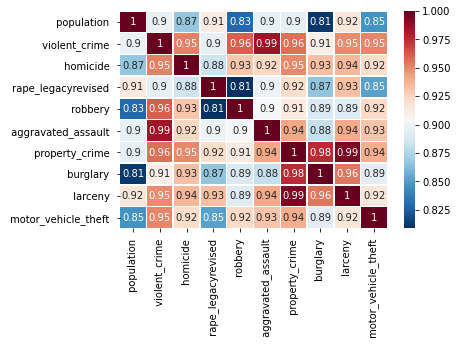

In [ ]:
#correlation visual, heatmap
sns.heatmap(df.corr('pearson'), 
            xticklabels=df.corr('pearson').columns,
            yticklabels=df.corr('pearson').columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


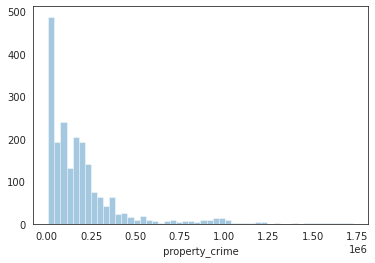

In [ ]:
sns.distplot(df[' property_crime '], kde=False)

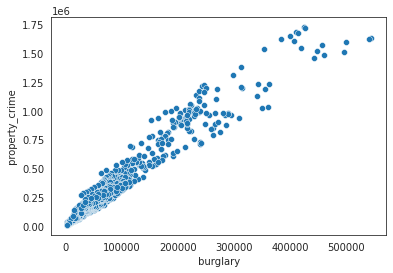

In [ ]:

sns.set_style('white')
sns.scatterplot(x=" burglary ", y=" property_crime ", data=df)

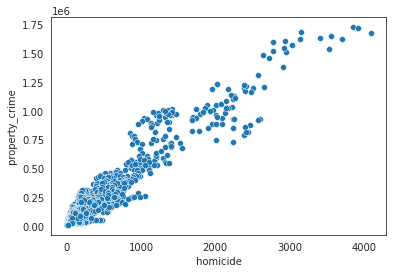

In [ ]:
sns.set_style('white')
sns.scatterplot(x=" homicide ", y=" property_crime ", data=df)

The boxplot below shows a lot of outliers of the property crime category.

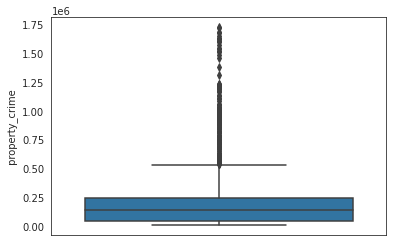

In [ ]:
sns.boxplot(y= " property_crime ", data=df)

The mathematics:

In [ ]:
pop_sum = df[' population '].sum()
#df_crimes_sum = df_crimes.sum()
#pop_sum/df_crimes_sum
#pop_sum/df_crimes.size
#df_crimes.size
#df_crimes_sum = df_crimes.sum().sum()
pop_sum/df_crimes_sum

11.595637074033514

12 crimes per person; Just a ratio, but an idea of the amount of crimes in the country as a whole. Definately not saying everyone is a criminal...or are we?

In [ ]:
#sample mean (xbar, to be exact) of crimes reported, half of the
#population from 1979 to 2019, a span of 40 years
df_crimes_ttl_mean = df_crimes.mean().sum()
df_crimes_ttl_mean

469947.5151807228

In [ ]:
#doubled the above for entire population
df_crimes_ttl_mean*2

939895.0303614456

In [ ]:
#also doubled number of crimes per person; now 23:1
pop_sum/df_crimes_sum*2

23.191274148067027

In [ ]:
#sample (xbar) mean
df_crimes.mean().sum()

469947.5151807228

# *Conclusion*
How many crimes are there that are not being reported to the FBI? I estimate about 470M (df_crimes.mean().sum() crimes were reported to the FBI ofver 40 years. Currently, that covers about half the population. The ratio of [reported] crimes to person is 12:1, doubled is 23:1. Each crime is 1 out of 3 (The crimes were reported to the FBI/reported, but not to the FBI/not reported at all ('invisible')). There is at least approximately a ratio of 4:1 'invisible' 'crimes'. Considering that not everyone is a criminal, the ratio is approximately 16:1. That leaves 7 crimes for one individual that were and/or weren't reproted to the FBI. These questions are answered with a population mean (mu) relative to the acutual population. This is something that our justice system can use. As in the movie, Minority Report, police were arresting ‘criminals’ before they committed the crime. I do not think that is a logical or lawful way to do things. A better way would be to consider those criminals as “invisible”. If a ‘criminal’ is considered to be ‘invisible’, then I am sure it is a more justifiable action to arrest them (with probable cause, of course). These ‘invisible crimes’ are a monumental obstruction to justice. There are victims that do not have a voice or system to prove that they are being assaulted. The world will be a better place if we could “see” ALL crimes being committed and serve justice accordingly. My last research question I asked was what about the victims? The answer to that is the same for any victime- they deserve justice.